# 14889 스타트와 링크 ★

### Q)
    오늘은 스타트링크에 다니는 사람들이 모여서 축구를 해보려고 한다. 축구는 평일 오후에 하고 의무 참석도 아니다. 축구를 하기 위해 모인 사람은 총 N명이고 신기하게도 N은 짝수이다. 이제 N/2명으로 이루어진 스타트 팀과 링크 팀으로 사람들을 나눠야 한다.

    BOJ를 운영하는 회사 답게 사람에게 번호를 1부터 N까지로 배정했고, 아래와 같은 능력치를 조사했다. 능력치 Sij는 i번 사람과 j번 사람이 같은 팀에 속했을 때, 팀에 더해지는 능력치이다. 팀의 능력치는 팀에 속한 모든 쌍의 능력치 Sij의 합이다. Sij는 Sji와 다를 수도 있으며, i번 사람과 j번 사람이 같은 팀에 속했을 때, 팀에 더해지는 능력치는 Sij와 Sji이다.

    N=4이고, S가 아래와 같은 경우를 살펴보자.

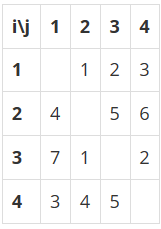

    예를 들어, 1, 2번이 스타트 팀, 3, 4번이 링크 팀에 속한 경우에 두 팀의 능력치는 아래와 같다.

- 스타트 팀: S12 + S21 = 1 + 4 = 5
- 링크 팀: S34 + S43 = 2 + 5 = 7

    1, 3번이 스타트 팀, 2, 4번이 링크 팀에 속하면, 두 팀의 능력치는 아래와 같다.

- 스타트 팀: S13 + S31 = 2 + 7 = 9
- 링크 팀: S24 + S42 = 6 + 4 = 10

    축구를 재미있게 하기 위해서 스타트 팀의 능력치와 링크 팀의 능력치의 차이를 최소로 하려고 한다. 위의 예제와 같은 경우에는 1, 4번이 스타트 팀, 2, 3번 팀이 링크 팀에 속하면 스타트 팀의 능력치는 6, 링크 팀의 능력치는 6이 되어서 차이가 0이 되고 이 값이 최소이다.

### Input)
    첫째 줄에 N(4 ≤ N ≤ 20, N은 짝수)이 주어진다. 둘째 줄부터 N개의 줄에 S가 주어진다. 각 줄은 N개의 수로 이루어져 있고, i번 줄의 j번째 수는 Sij 이다. Sii는 항상 0이고, 나머지 Sij는 1보다 크거나 같고, 100보다 작거나 같은 정수이다.

### Output)
    첫째 줄에 스타트 팀과 링크 팀의 능력치의 차이의 최솟값을 출력한다.

### Source Code)

In [ ]:
from sys import stdin
input = stdin.readline

stats = []
result_list = []

N = int(input())
for i in range(N):
    stats.append(list(map(int, input().split())))

def calc_result(start, link):
    start_result = 0
    link_result = 0
    for i in range(len(start)):
        for j in range(len(start)):
            if i == j:
                continue

            start_result += stats[start[i]][start[j]]
            link_result += stats[link[i]][link[j]]

    return abs(start_result - link_result)

def dfs(idx):
    global start_team

    if idx == N//2:
        link_team = []
        for i in range(N):
            if i not in start_team:
                link_team.append(i)

        result_list.append(calc_result(start_team, link_team))
        return
    
    for i in range(N):
        if i not in start_team:
            start_team.append(i)
            dfs(idx+1)
            start_team = start_team[:idx]

start_team = [1]
dfs(1)

print(min(result_list))

위와 같이 코드를 짰을 땐 시간초과가 발생했다.
이유는 다음과 같을 것으로 생각한다.
- 팀명만 바뀌고 팀 구성원은 같은 경우가 발생함 -> 이는 고려해 줄 필요가 없음
- 이를 줄이기 위해 start_team에 항상 1을 포함하게 짰지만 그래도 시간초과 발생

### combinations 사용한 Source Code)

In [ ]:
from sys import stdin, maxsize # maxsize는 비교할 변수를 생성하는 것
from itertools import combinations
input = stdin.readline

N = int(input())
stats = [list(map(int, input.split())) for _ in range(N)]
members = list(range(N))
min_value = maxsize

for r1 in combinations(members, N//2):
    start, link = 0, 0
    r2 = list(set(members) - set(r1)) # set을 이용해 중복되는 경우 제거
    for r in combinations(r1, 2):
        start += (stats[r[0]][r[1]] + stats[r[1]][r[0]])
    for r in combinations(r2, 2):
        link += (stats[r[0][r[1]]] + stats[r[1]][r[0]])

    min_value = min(min_value, abs(start-link))

print(min_value)

위 코드는 결과는 잘 나오지만 런타임 에러가 발생하였다(Attribute Error)

### back tracking을 이용한 Source Code)

In [ ]:
from sys import stdin, maxsize # maxsize는 비교할 변수를 생성하는 것
input = stdin.readline

N = int(input())
graph = [list(map(int, input().split())) for _ in range(N)]
visit = [False for _ in range(N)]
min_value = maxsize

def dfs(depth, idx):
    global min_value
    if depth == N//2:
        power1, power2 = 0, 0
        for i in range(N):
            for j in range(N):
                if visit[i] and visit[j]:
                    power1 += graph[i][j]
                elif not visit[i] and not visit[j]:
                    power2 += graph[i][j]
        min_value = min(min_value, abs(power1-power2))

    for i in range(idx, N):
        if not visit[i]:
            visit[i] = True
            dfs(depth+1, i+1) # idx 가 아닌 i로 처리해야함 idx로 하면 시간초과
            visit[i] = False

dfs(0, 0)
print(min_value)

처음에 한 back tracking과 알고리즘 적으로는 비슷하지만 시간초과를 하는 방법이 조금 달랐다.

1. visit이라는 리스트 변수를 통해 방문했는지 안했는지를 체크하였음
2. depth를 통해 현재 몇 명까지 들어갔는지 파악하였고, idx를 통해 중복되는 경우를 제거하려 하였음(이 부분이 조금 달랐다.) <- 맞는지 잘 모르겠음...
3. depth가 N//2 인 경우는 결과를 계산해 차를 계산해주면 됨
4. for문을 통해 현재 받은 idx부터 N까지만 계산을 하면 됨